### CS166 Pre-Class Work for Session 3.1

## Mean-Field Approximation

_Yoav Rabinovich, Jan 2019_

-----------------

#### **Sayama Exercise 11.8:**

Host-pathogen CA with density chart:

In [0]:
import matplotlib.pyplot as plt
import pylab as PL
import random as RD
import scipy as SP
import numpy as np

In [0]:
RD.seed()

width = 50
height = 50
initProb = 0.01
infectionRate = 0.5
regrowthRate = 0.2

def init():
    global time, config, nextConfig, ratio

    time = 0
    ratio=[]
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    plt.subplot(121)
    PL.pcolor(config, vmin = 0, vmax = 2, cmap = PL.cm.jet)
    PL.axis('image')
    PL.title('t = ' + str(time))
    plt.subplot(122)
    if len(ratio)!=0:
        plt.plot(range(len(ratio)),ratio)
        

def step():
    global time, config, nextConfig, ratio

    time += 1
    healthy = 0
    infected = 0
    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if RD.random() < regrowthRate:
                                state = 1
                
            elif state == 1:
                healthy+=1
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if RD.random() < infectionRate:
                                state = 2
                                
            else:
                infected+=1
                state = 0

            nextConfig[y, x] = state
    
    ratio.append(healthy/infected)
    config, nextConfig = nextConfig, config

import pycxsimulator
pycxsimulator.GUI().start(func=[init,draw,step])

#### Sayama Exercise 12.6:

Confirm validity of probability distributions on table 12.1

Since the term $\binom{8}{k}p^k(1-p)^{(8-k)}$ is a probability distribution, it equals 1, therefore we have:

$(1-p)5$, \\
$(1-p)4$, \\
$p*4$, \\
$p*5$, \\

The sum of which is 1.

#### Sayama Exercise 12.7:

Apply mean-field approximation to the Game of Life 2-D CA
model. Derive a difference equation for the average state density pt, and predict
its asymptotic behavior.

Game of life rules dictate that a cell stays alive if it has 2 or 3 live neighbors, and becomes alive if it has 3 neighbors. Adding up:

$$p_{t+1} = p\sum_{k=2}^3 {8\choose k}p^k(1-p)^{8-k} + (1-p){8\choose 3}p^3(1-p)^{8-3}$$
$$={8\choose 2}p^3(1-p)^{6} + {8\choose 3}p^3(1-p)^{5}$$
$$=28p^3(1-p)^{6} + 56p^3(1-p)^{5}$$
$$28 p^9 - 224 p^8 + 700 p^7 - 1120 p^6 + 980 p^5 - 448 p^4 + 84 p^3$$

Plotting a web plot:

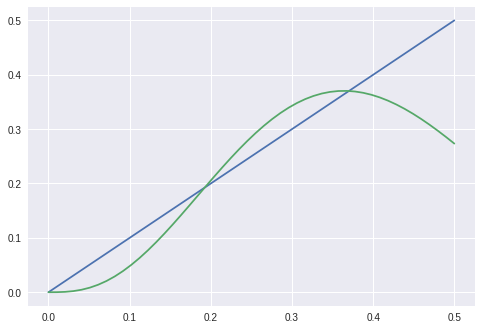

In [0]:
p = np.linspace(0, 0.5, 50)
plt.plot(p, p)
plt.plot(p, 28*p**9 - 224*p**8 + 700*p**7 - 1120*p**6 + 980*p**5 - 448*p**4 + 84*p**3)

Manually tracing paths from initial conditions reveals that the stable equilibria are at 0 and ~0.375, which does not represent the fluctuations in density and sparse yet stable populations we see while simulating the game of life.